In [1]:
import pandas as pd

df = pd.read_excel('womenfootball.xlsx')
target_variables = ["Value"]
feature_variables = [col for col in df.columns if col not in target_variables and col != "Name"]

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

print(df.info())
print(df.describe())

num_instances = df.shape[0]
print(f"Instances Number: {num_instances}")

num_features = len(feature_variables)
print(f"Features Number: {num_features}")


unique_X_values = df["Value"].nunique()

print(f"Unique -Value- Values: {unique_X_values}")

Missing Values:
 Name                 0
Age                  0
Position             0
Club                 0
Nation               0
Value                0
Overall              0
Potential            0
Total Attacking      0
Total Skill          0
Total Movement       0
Total Power          0
Total Mentality      0
Total Defending      0
Total Goalkeeping    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1620 non-null   object
 1   Age                1620 non-null   int64 
 2   Position           1620 non-null   int64 
 3   Club               1620 non-null   int64 
 4   Nation             1620 non-null   int64 
 5   Value              1620 non-null   int64 
 6   Overall            1620 non-null   int64 
 7   Potential          1620 non-null   int64 
 8   Total Attacking    1620 non-null   int64 
 

In [2]:
print("# Looking at the first 5 rows of the dataset:")
print(df.head())

print("For a certain number of rows:")
print(df.head(10))

print("/n Printing feature names:")
print(df.columns)

print("Checking data types:")
print(df.dtypes)

print("Get a statistical summary of features:")
print(df.describe())


# Looking at the first 5 rows of the dataset:
              Name  Age  Position  Club  Nation   Value  Overall  Potential  \
0   Aitana Bonmatí   25         4     5       5  745000       90         92   
1        M. Katoto   24         5     5       5  660000       88         92   
2  Alexia Putellas   29         4     5       5  635000       91         91   
3         S. Smith   22         5     5       5  610000       88         90   
4        C. Hansen   28         5     5       4  600000       90         90   

   Total Attacking  Total Skill  Total Movement  Total Power  Total Mentality  \
0              365          412             432          388              399   
1              428          384             397          416              323   
2              437          455             434          422              421   
3              406          400             444          432              351   
4              419          434             430          419              

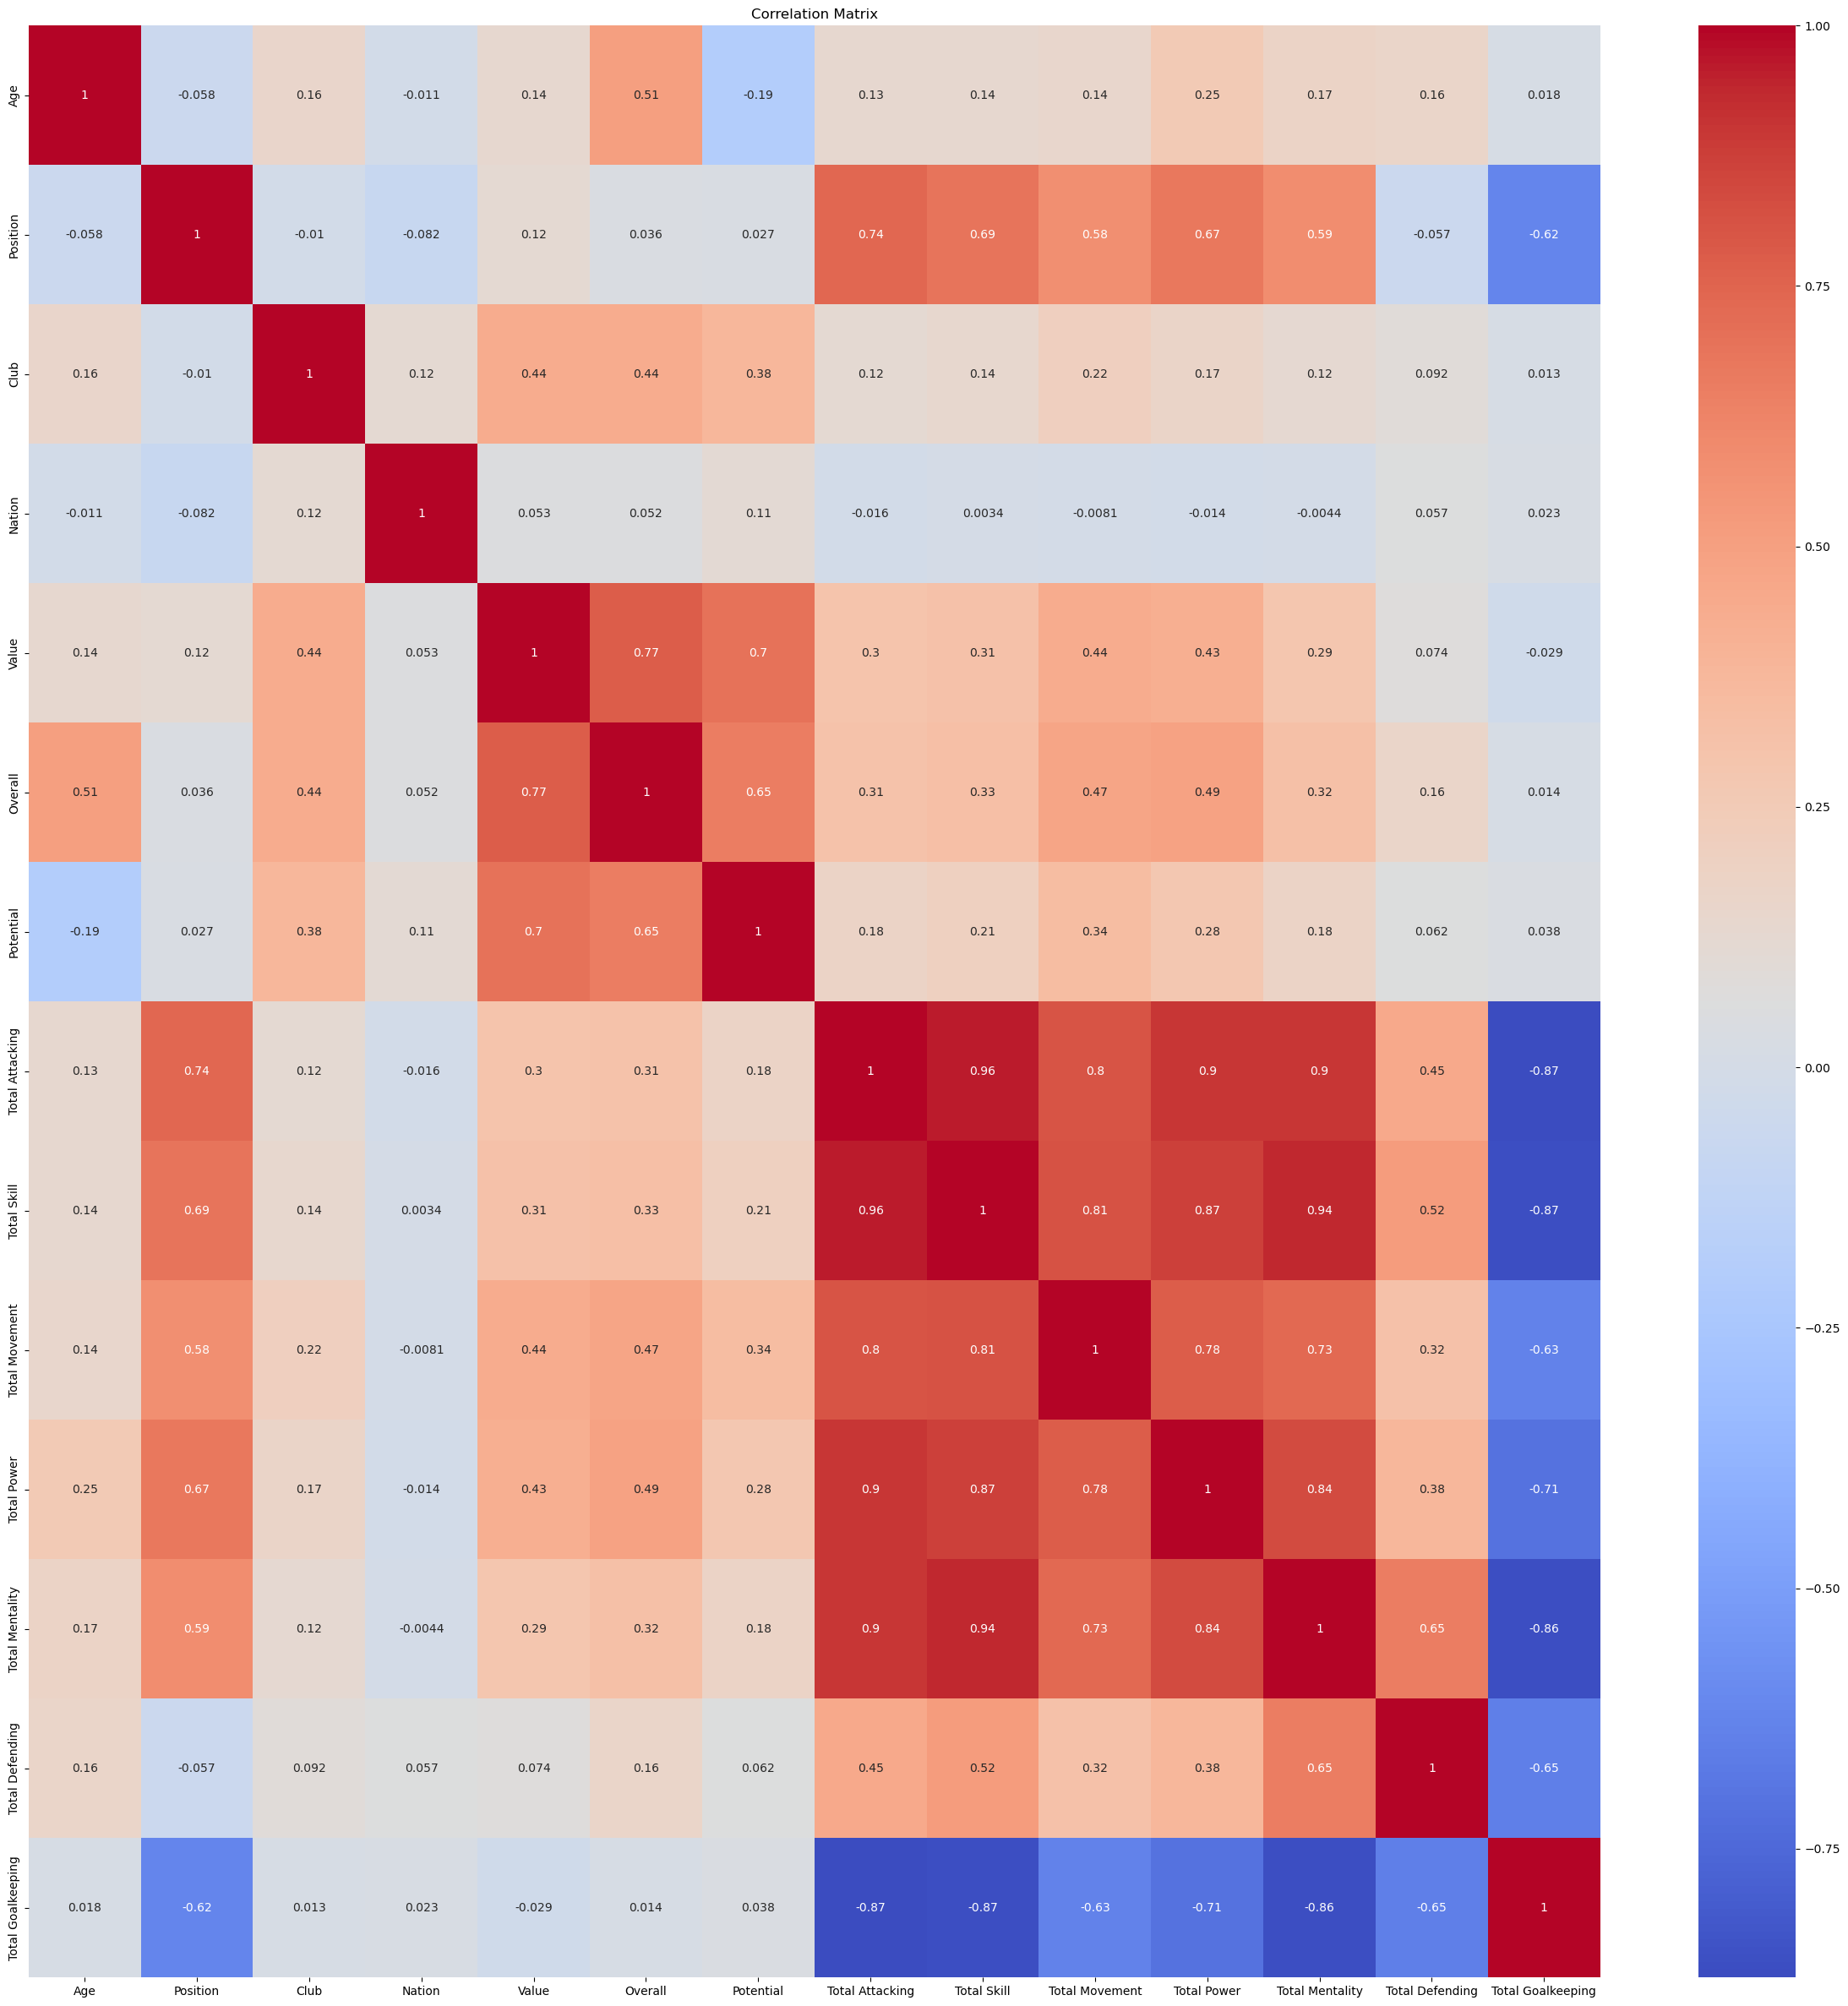

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.drop(columns=['Name'])

plt.figure(figsize=(30, 30))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.show()



C:\Users\19180\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


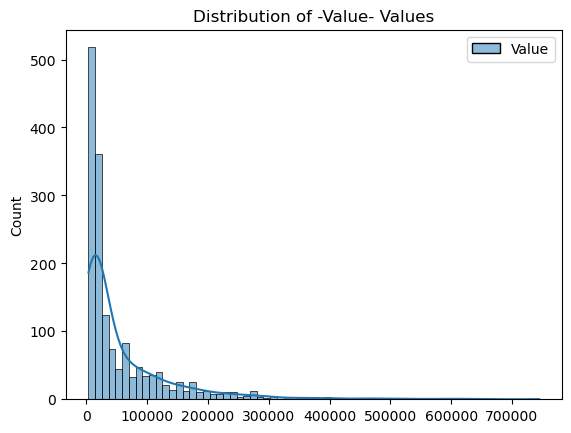

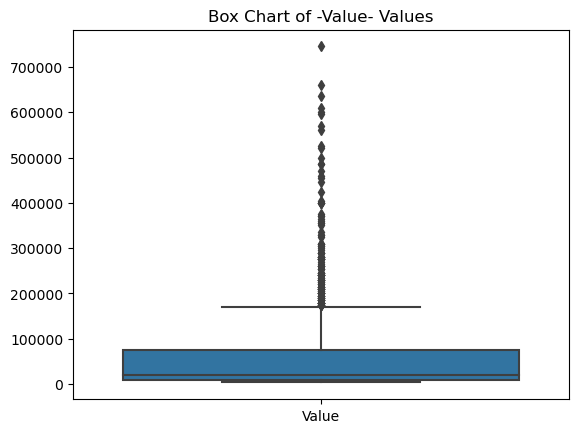

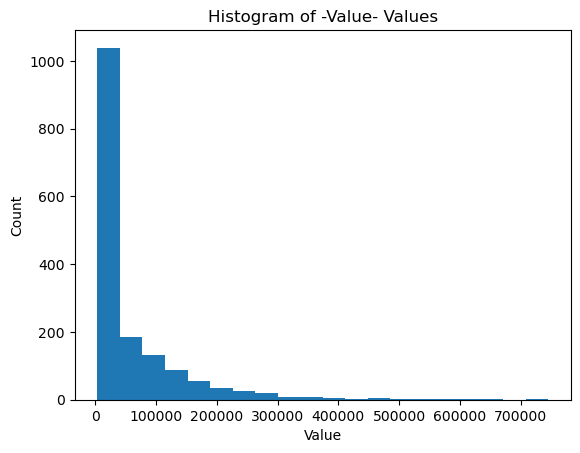

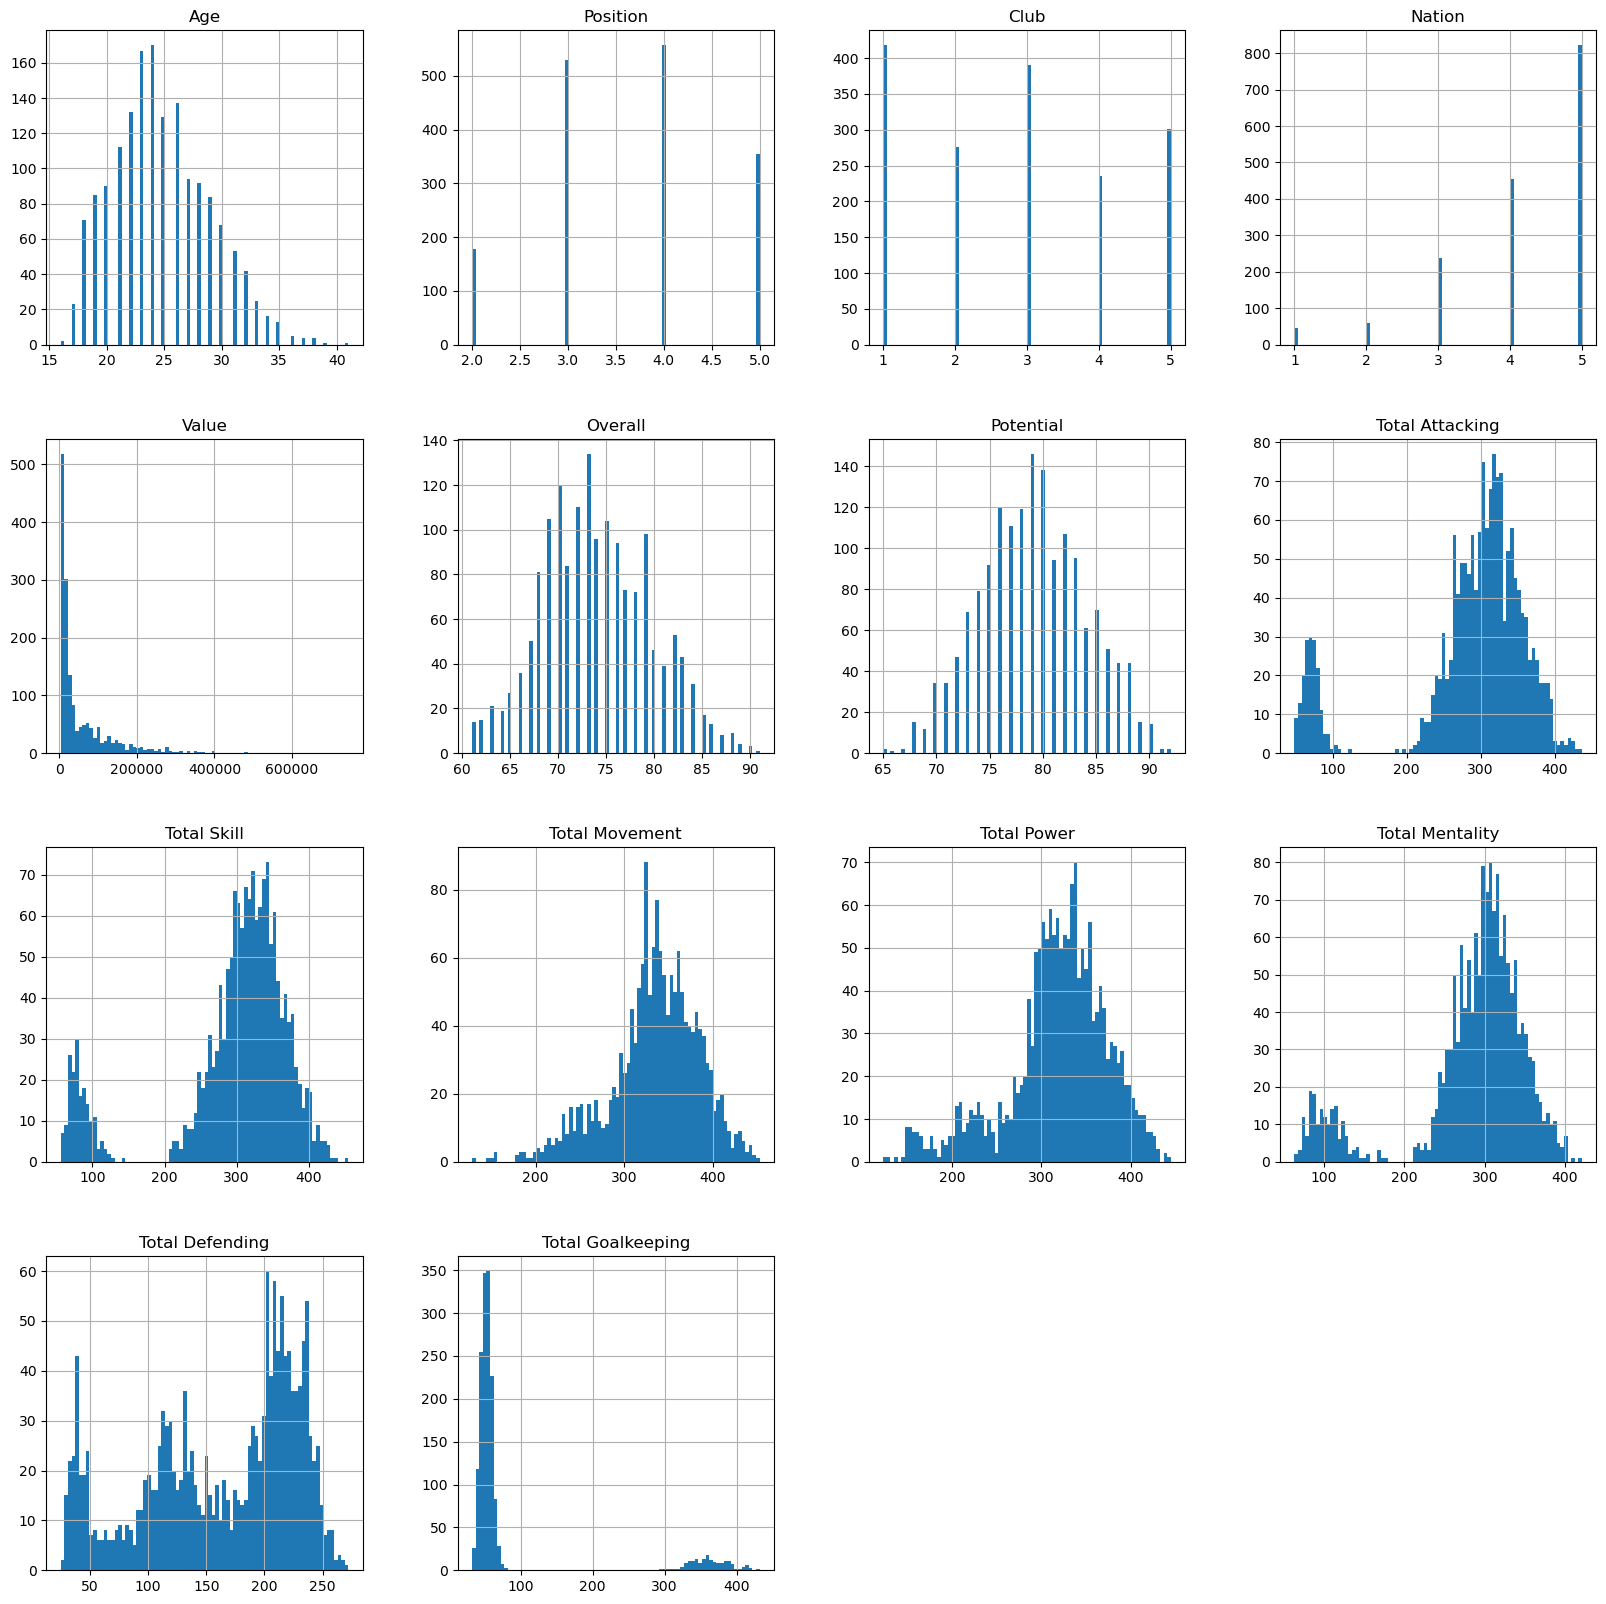

In [7]:
 import seaborn as sns
import matplotlib.pyplot as plt


x_target = 'Value'
other_features = feature_variables

sns.histplot(df[[x_target]], kde=True)
plt.title("Distribution of -Value- Values")
plt.show()


sns.boxplot(data=df[[x_target]])
plt.title("Box Chart of -Value- Values")
plt.show()


plt.hist(df[[x_target]], bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of -Value- Values')
plt.show()


df.hist(bins=80, figsize=(20, 20))
plt.show()


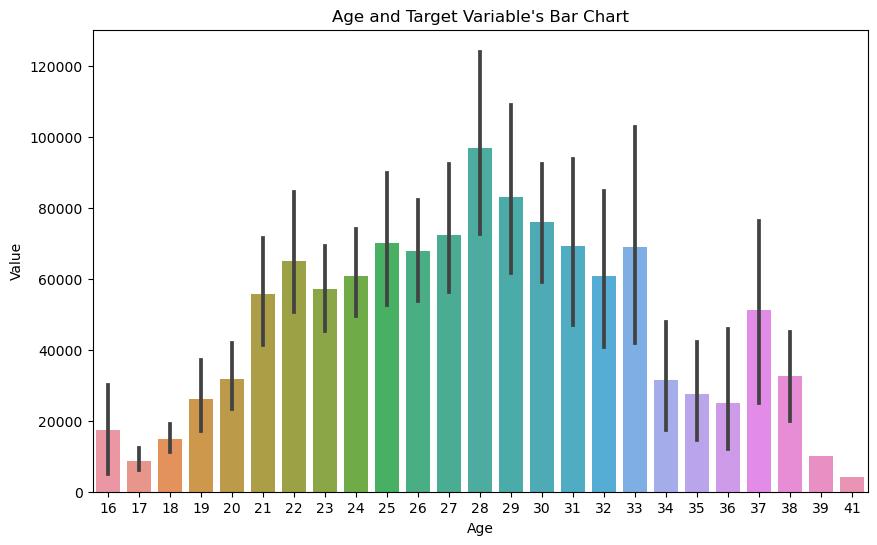

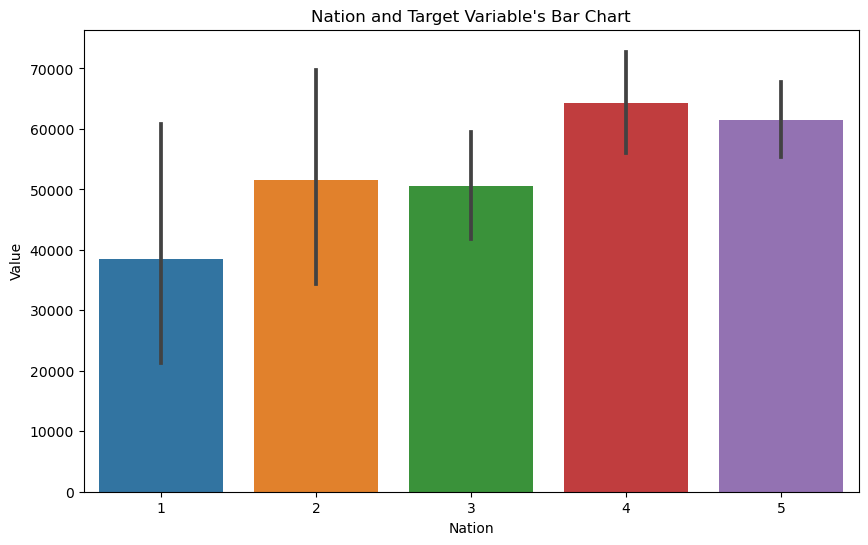

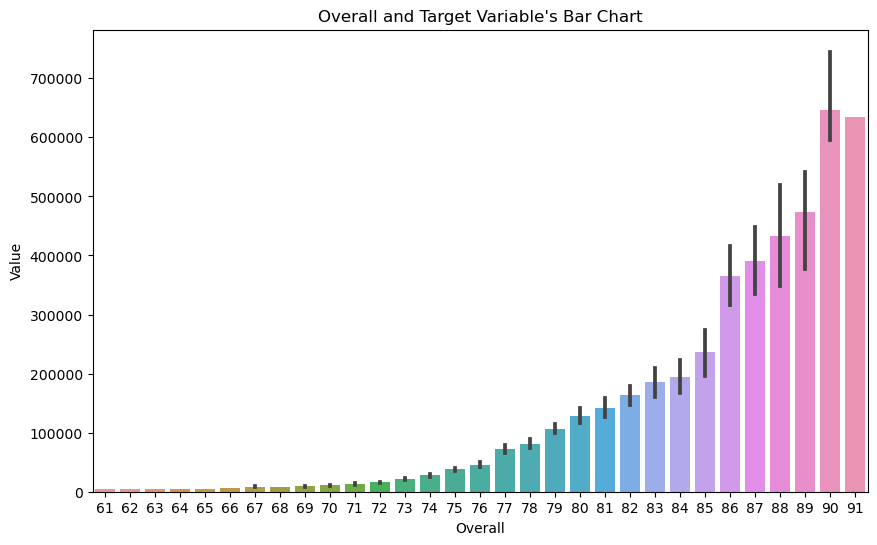

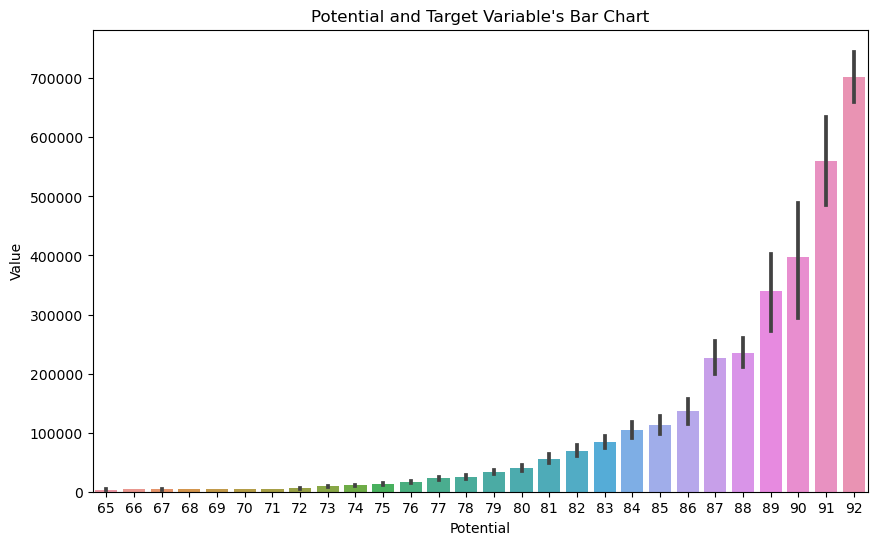

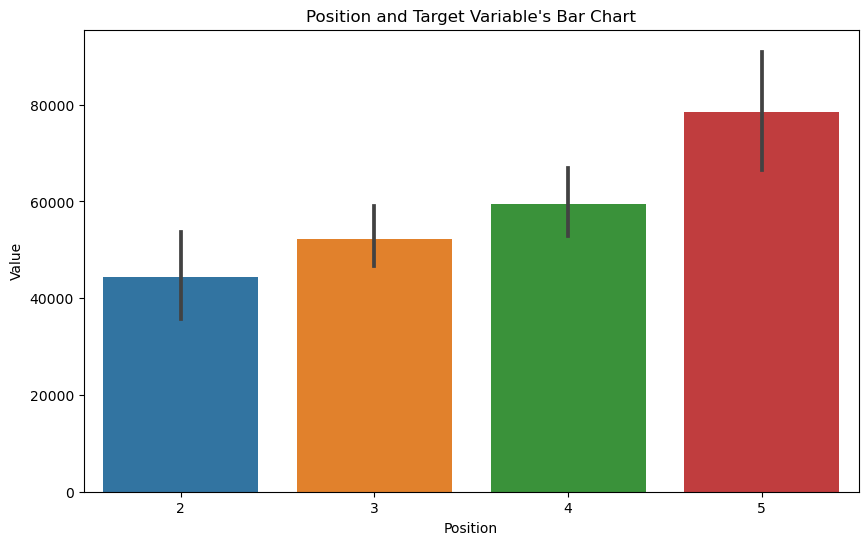

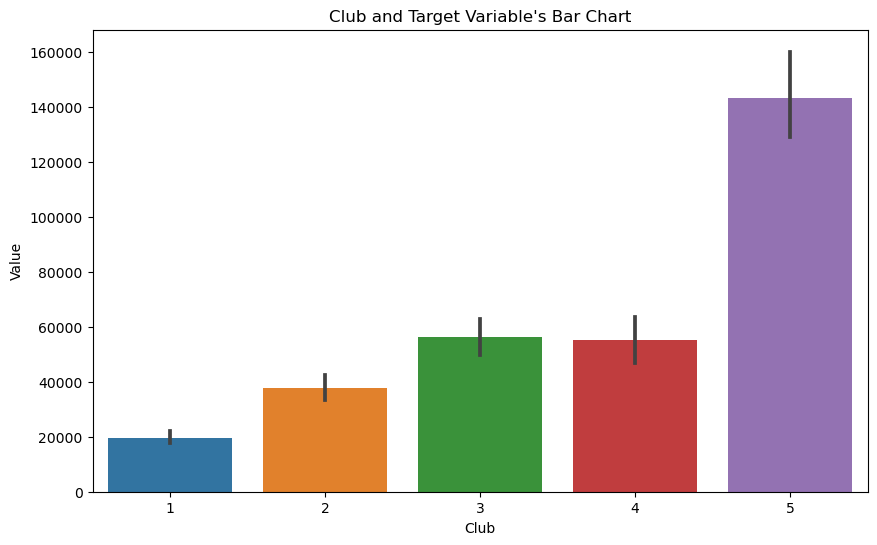

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_compare = ["Age", "Nation", "Overall", "Potential", "Position", "Club"]

for feature in features_to_compare:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Value', data=df)
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f"{feature} and Target Variable's Bar Chart")
    plt.show()


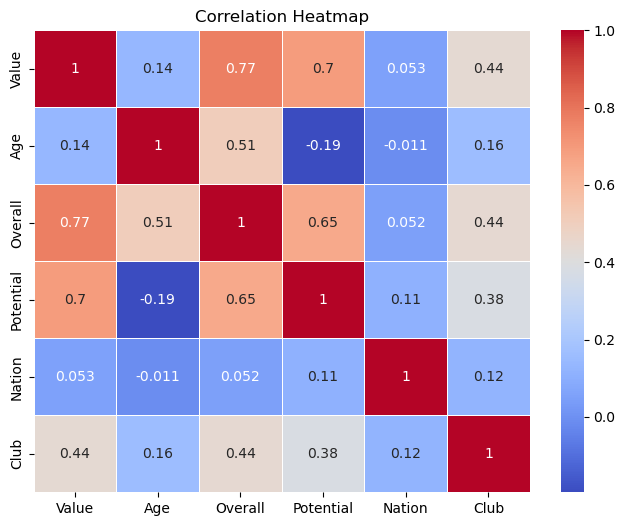

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_features = df[['Value', 'Age', 'Overall',"Potential", "Nation","Club"]]


corr_matrix = selected_features.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = df[feature_variables]
y = df[target_variables]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1134
Validation set size: 243
Test set size: 243


In [12]:
from sklearn.preprocessing import MinMaxScaler
df.dropna(inplace=True)
df.columns = df.columns.astype(str)
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_data = scaler.fit_transform(X_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


gb_reg = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = AdaBoostRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

print("En iyi parametreler:", grid_search.best_params_)


En iyi parametreler: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

print("En iyi parametreler:", grid_search.best_params_)


En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
pip install skopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from skopt import gp_minimize
from sklearn.ensemble import GradientBoostingRegressor
from skopt.space import Real, Integer
from sklearn.model_selection import cross_val_score

# Hedef fonksiyon (model performansını ölçen fonksiyon)
def evaluate_model(params):
    learning_rate, n_estimators, max_depth, subsample = params  # Hiperparametreleri çözümle
    model = GradientBoostingRegressor(
        loss='squared_error',
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        subsample=subsample,
        criterion='friedman_mse'
    )
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()  # Negatif ortalama karesel hata döndürülür (Bayesian optimizasyon maksimize eder)

# Hiperparametre alanı
space = [
    Real(0.01, 0.5, name='learning_rate'),
    Integer(50, 200, name='n_estimators'),
    Integer(3, 10, name='max_depth'),
    Real(0.5, 1.0, name='subsample')
]

# Bayesian optimizasyonu uygula
result = gp_minimize(evaluate_model, space, n_calls=20, random_state=42)

print("En iyi hiperparametre değerleri:")
print("Learning Rate:", result.x[0])
print("N Estimators:", result.x[1])
print("Max Depth:", result.x[2])
print("Subsample:", result.x[3])
print("En iyi negatif ortalama karesel hata:", result.fun)



C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

En iyi hiperparametre değerleri:
Learning Rate: 0.020044897371653932
N Estimators: 200
Max Depth: 7
Subsample: 0.6858635004123073
En iyi negatif ortalama karesel hata: 117876762.1812325


In [17]:
from skopt import gp_minimize
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from skopt.space import Real, Integer
from sklearn.model_selection import cross_val_score

# Hedef fonksiyon (model performansını ölçen fonksiyon)
def evaluate_model(params):
    learning_rate, n_estimators, base_estimator_max_depth = params  # Hiperparametreleri çözümle
    model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=base_estimator_max_depth, criterion='squared_error'),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=1
    )
    scores = cross_val_score(model, X_train, y_train.to_numpy().ravel(), cv=5, scoring='neg_mean_squared_error') # y_train'i to_numpy() ile dönüştürüyoruz
    return -scores.mean()  # Negatif ortalama karesel hata döndürülür (Bayesian optimizasyon maksimize eder)

# Hiperparametre alanı
space = [
    Real(0.001, 1, name='learning_rate'),
    Integer(10, 200, name='n_estimators'),
    Integer(3, 20, name='base_estimator_max_depth')
]

# Bayesian optimizasyonu uygula
result = gp_minimize(evaluate_model, space, n_calls=20, random_state=42)

print("En iyi hiperparametre değerleri:")
print("Learning Rate:", result.x[0])
print("N Estimators:", result.x[1])
print("Base Estimator Max Depth:", result.x[2])
print("En iyi negatif ortalama karesel hata:", result.fun)

En iyi hiperparametre değerleri:
Learning Rate: 0.004686819121983951
N Estimators: 200
Base Estimator Max Depth: 12
En iyi negatif ortalama karesel hata: 169350960.95463845


In [18]:
from skopt import gp_minimize
from sklearn.ensemble import RandomForestRegressor
from skopt.space import Integer, Real
from sklearn.model_selection import cross_val_score

# Hedef fonksiyon (model performansını ölçen fonksiyon)
def evaluate_model(params):
    n_estimators, max_depth, min_samples_leaf, min_samples_split = params  # Hiperparametreleri çözümle
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        bootstrap=True,  # Bootstrap örnekleme kullanılacak mı?
        random_state=42
    )
    # 5 katlı çapraz doğrulama kullanarak model performansını değerlendir
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Negatif ortalama karesel hata döndürülür (Bayesian optimizasyon maksimize eder)
    return -scores.mean()


# Hiperparametre alanı
space = [
    Integer(10, 500, name='n_estimators'),
    Integer(3, 30, name='max_depth'),
    Integer(1, 10, name='min_samples_leaf'),
    Integer(2, 20, name='min_samples_split')
]

# Bayesian optimizasyonu uygula
result = gp_minimize(evaluate_model, space, n_calls=20, random_state=42)

print("En iyi hiperparametre değerleri:")
print("N Estimators:", result.x[0])
print("Max Depth:", result.x[1])
print("Min Samples Leaf:", result.x[2])
print("Min Samples Split:", result.x[3])
print("En iyi negatif ortalama karesel hata:", result.fun)


C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\19180\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

En iyi hiperparametre değerleri:
N Estimators: 500
Max Depth: 30
Min Samples Leaf: 1
Min Samples Split: 2
En iyi negatif ortalama karesel hata: 147543569.9805534


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import time

models = [
    ('Linear Regression', LinearRegression(fit_intercept=True)),
    ('Random Forest', RandomForestRegressor(n_estimators=500,max_features=None,bootstrap=True,max_depth=30,min_samples_leaf=1,min_samples_split= 2)),
    ('Gradient Boosting', GradientBoostingRegressor(loss='squared_error', learning_rate=0.020044897371653932, n_estimators=200, subsample=0.6858635004123073, criterion='friedman_mse', max_depth=7)),
    ('KNN', KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2)),
    ('AdaBoost', AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=8, criterion='squared_error'), n_estimators=50, learning_rate=0.004686819121983951 , random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=5))
]
results = pd.DataFrame(columns=["Model", "Train_Score", "Test_Score", "MSE", "RMSE", "MAE", "CV Accuracy Mean", "CV Accuracy Std Dev", "Train Time", "Prediction Time"])

saved_models = {}

for name, model in models:
    start_time = time.time()
    model.fit(X_train,y_train.values.ravel())
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time
    saved_models[name] = model
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # RMSE hesaplanıyor (test verisi üzerinde)
    mae = mean_absolute_error(y_test, predictions)  # MAE hesaplanıyor (test verisi üzerinde)
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=20)  # Çapraz doğrulama skorları (eğitilmiş veri seti üzerinde)
    model_results = pd.DataFrame({"Model": name,
                                  "Train_Score": model.score(X_train, y_train),
                                  "Test_Score": model.score(X_test, y_test),
                                  "MSE": mse,
                                  "RMSE": rmse,
                                  "MAE": mae,
                                  "CV Accuracy Mean": scores.mean(),
                                  "CV Accuracy Std Dev": scores.std() * 2,
                                  "Train Time": train_time,
                                  "Prediction Time": prediction_time},
                                 index=[0])
    results = pd.concat([results, model_results], ignore_index=True)

display(results.style.set_table_attributes("style='display:inline'").set_caption('Regression Results'))

best_model = results.loc[results['Train_Score'].idxmax()]['Model']
print(f"The best training algorithm: {best_model}")

best_model = results.loc[results['Test_Score'].idxmax()]['Model']
print(f"The best testing algorithm: {best_model}")

best_rmse = results.loc[results['RMSE'].idxmin()]['Model']
print(f"The lowest RMSE algorithm: {best_rmse}")

best_mae = results.loc[results['MAE'].idxmin()]['Model']
print(f"The lowest MAE algorithm: {best_mae}")

fastest_train = results.loc[results['Train Time'].idxmin()]['Model']
print(f"The fastest training algorithm: {fastest_train}")

fastest_predict = results.loc[results['Prediction Time'].idxmin()]['Model']
print(f"The fastest prediction algorithm: {fastest_predict}")


C:\Users\19180\AppData\Local\Temp\ipykernel_17000\177100054.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)


,Model,Train_Score,Test_Score,MSE,RMSE,MAE,CV Accuracy Mean,CV Accuracy Std Dev,Train Time,Prediction Time
0,Linear Regression,0.696612,0.724221,1677821975.229280,40961.225265,31621.461148,0.680883,0.091856,0.003191,0.000965
1,Random Forest,0.997485,0.981586,112029396.372685,10584.394001,4799.787037,0.983458,0.025774,7.692833,0.032001
2,Gradient Boosting,0.999465,0.989823,61915493.514903,7868.639877,4089.197947,0.986827,0.022916,1.873969,0.002991
3,KNN,0.807508,0.737597,1596445892.489712,39955.548957,23593.312757,0.674715,0.248933,0.001994,0.003498
4,AdaBoost,0.999526,0.981945,109843992.172665,10480.648461,5102.808925,0.978097,0.039819,0.480896,0.007567
5,Decision Tree,0.981009,0.916685,506884480.166772,22514.095144,11738.298892,0.954433,0.050836,0.005987,0.000000


The best training algorithm: AdaBoost
The best testing algorithm: Gradient Boosting
The lowest RMSE algorithm: Gradient Boosting
The lowest MAE algorithm: Gradient Boosting
The fastest training algorithm: KNN
The fastest prediction algorithm: Decision Tree


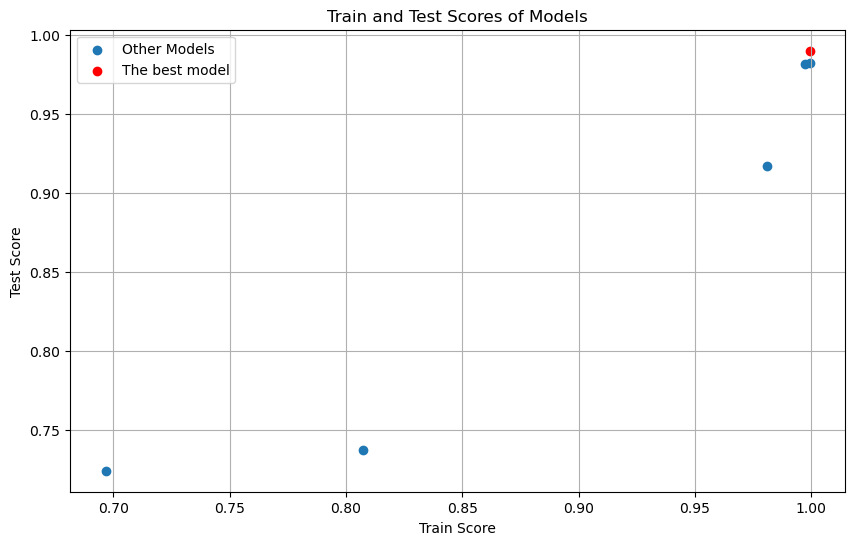

In [24]:
import matplotlib.pyplot as plt


best_model_name = results.loc[results['Test_Score'].idxmax()]['Model']


best_train_score = results.loc[results['Model'] == best_model_name]['Train_Score'].values[0]
best_test_score = results.loc[results['Model'] == best_model_name]['Test_Score'].values[0]

other_models = results[results['Model'] != best_model_name]
other_train_scores = other_models['Train_Score']
other_test_scores = other_models['Test_Score']


plt.figure(figsize=(10, 6))
plt.scatter(other_train_scores, other_test_scores, label='Other Models')
plt.scatter(best_train_score, best_test_score, color='red', label='The best model')
plt.xlabel('Train Score')
plt.ylabel('Test Score')
plt.title('Train and Test Scores of Models')
plt.legend()
plt.grid(True)
plt.show()


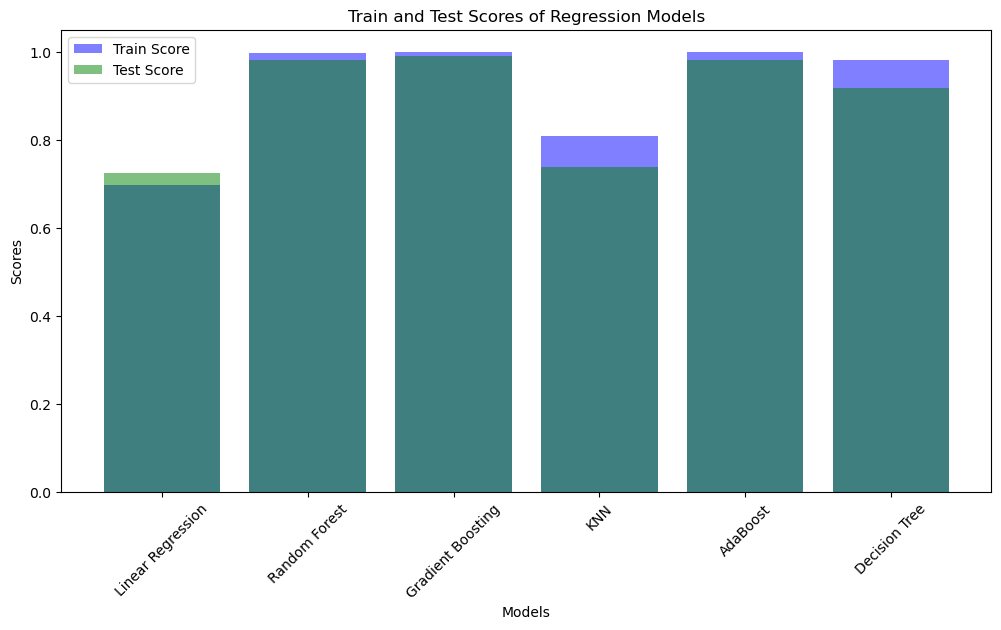

In [25]:
import matplotlib.pyplot as plt

model_names = results['Model']
train_scores = results['Train_Score']
test_scores = results['Test_Score']

plt.figure(figsize=(12, 6))
plt.bar(model_names, train_scores, color='blue', alpha=0.5, label='Train Score')
plt.bar(model_names, test_scores, color='green', alpha=0.5, label='Test Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores of Regression Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()

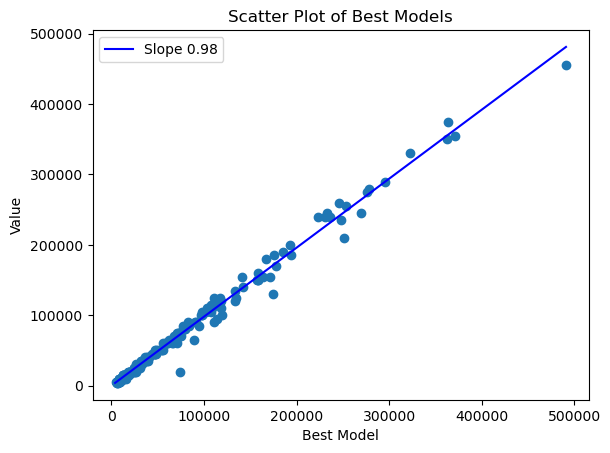

In [26]:
import matplotlib.pyplot as plt
import numpy as np

best_model_name = results.loc[results['Test_Score'].idxmax()]['Model']
best_model = saved_models[best_model_name]


predictions = best_model.predict(X_test)


predictions = np.array(predictions).astype(float)
y_test = np.array(y_test).astype(float)


plt.scatter(predictions, y_test)

plt.xlabel("Best Model")
plt.ylabel("Value")


plt.title("Scatter Plot of Best Models")

min_value = min(min(predictions), min(y_test))
max_value = max(max(predictions), max(y_test))


x = np.linspace(min_value, max_value, 100)
y = 0.98 * x
plt.plot(x, y, color='blue', linestyle='solid', label='Slope 0.98')


plt.legend()
plt.show()


C:\Users\19180\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


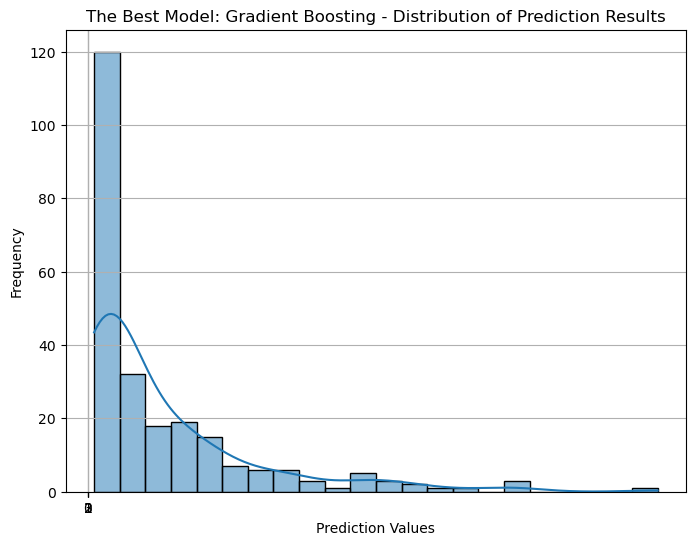

In [27]:

y_test_pred = best_model.predict(X_test)


plt.figure(figsize=(8, 6))
sns.histplot(data=y_test_pred, kde=True)
plt.xlabel('Prediction Values')
plt.ylabel('Frequency')
plt.title(f'The Best Model: {best_model_name} - Distribution of Prediction Results')
plt.grid(True)
xticks = np.arange(0, 3.01, 1)

plt.xticks(xticks)
plt.show()


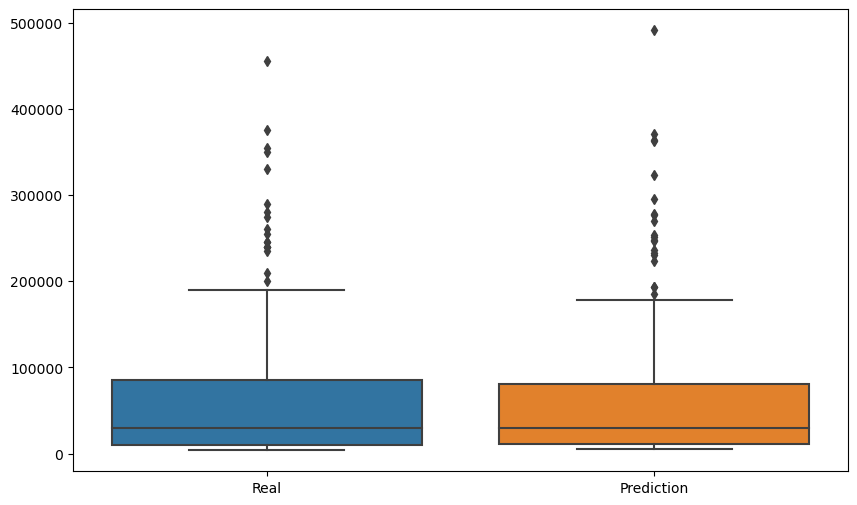

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Real': y_test.flatten(), 'Prediction': y_test_pred.flatten()}
df = pd.DataFrame(data)


plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()




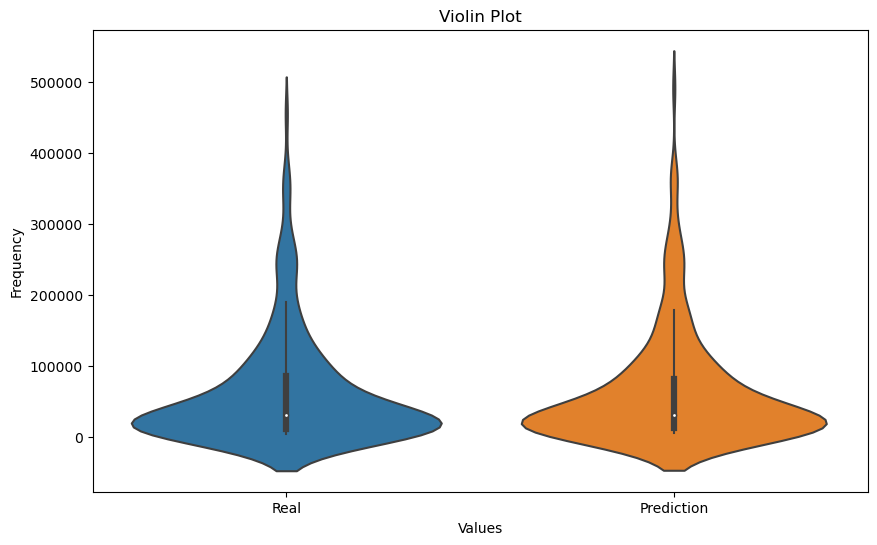

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.violinplot(data=pd.DataFrame({'Real': y_test.flatten(), 'Prediction': y_test_pred.flatten()}))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Violin Plot')
plt.show()


In [33]:
import pandas as pd

# y_test ve y_test_pred'in 1 boyutlu olup olmadığını kontrol edin ve gerekirse dönüştürün
y_test = y_test.flatten() if y_test.ndim > 1 else y_test
y_test_pred = y_test_pred.flatten() if y_test_pred.ndim > 1 else y_test_pred

result_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_test_pred})
result_df = result_df.sort_values(by='True Values', ascending=False)
result_df.to_excel('tahminler.xlsx', index=False)